## 03_04_two_variables time series

Standard imports

In [1]:
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as pp

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [3]:
import re
import mailbox
import csv

In [5]:
gapminder = pd.read_csv('gapminder.csv')

In [6]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14740 entries, 0 to 14739
Data columns (total 9 columns):
country             14740 non-null object
year                14740 non-null int64
region              14740 non-null object
population          14740 non-null float64
life_expectancy     14740 non-null float64
age5_surviving      14740 non-null float64
babies_per_woman    14740 non-null float64
gdp_per_capita      14740 non-null float64
gdp_per_day         14740 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.0+ MB


In [7]:
italy = gapminder.query('country  == "Italy"')

In [8]:
italy.head()



,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
6397,Italy,1800,Europe,18822234.0,29.69,54.259,5.47,2225.0,6.091718
6398,Italy,1810,Europe,19491674.0,29.69,54.395,5.47,2371.0,6.491444
6399,Italy,1820,Europe,20341608.0,29.69,54.531,5.47,2474.0,6.773443
6400,Italy,1830,Europe,21529667.0,29.69,54.667,5.47,2471.0,6.765229
6401,Italy,1840,Europe,22956667.0,29.69,54.804,5.47,2524.0,6.910335


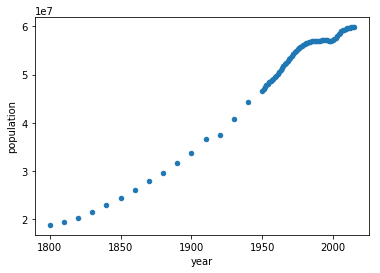

In [14]:
italy.plot.scatter("year","population")

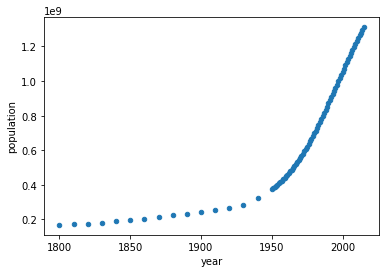

In [15]:
gapminder.query('country  == "India"').plot.scatter("year","population")

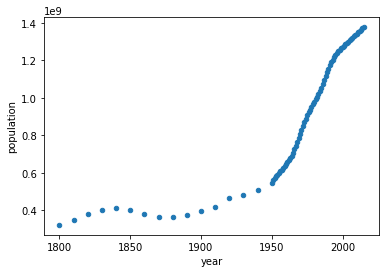

In [16]:
gapminder.query('country  == "China"').plot.scatter("year","population")

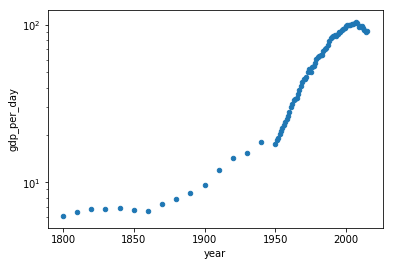

In [23]:
italy.plot.scatter("year","gdp_per_day", logy = True) 
#  take a look at the logarithm of income
# clearly last 20 years have been disappointing

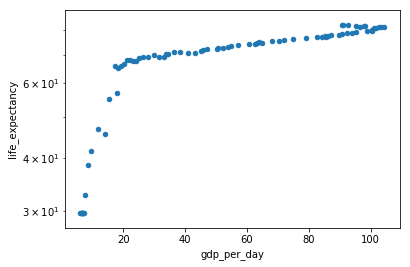

In [24]:
italy.plot.scatter("gdp_per_day","life_expectancy", logy = True)
# Even if income has decreased of recent, the life expectancy has continued to grow

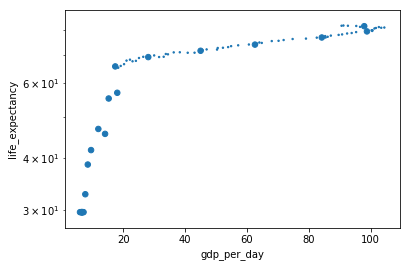

In [26]:
# mark decades by changing the size of the dots
# numpy where
size = np.where(italy.year % 10 == 0,30,2)
italy.plot.scatter("gdp_per_day","life_expectancy", logy = True, s= size)

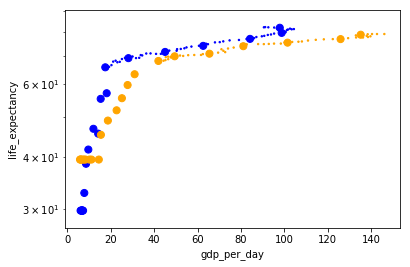

In [33]:
data = gapminder.query('(country == "Italy")or (country =="United States")')

size = np.where(data.year % 10 == 0,50,2)
color = np.where(data.country =="Italy", 'blue','orange')
data.plot.scatter("gdp_per_day","life_expectancy", logy = True, s= size, c = color)
# How about Italy and US
# US consistently richer, but also a little less healthy

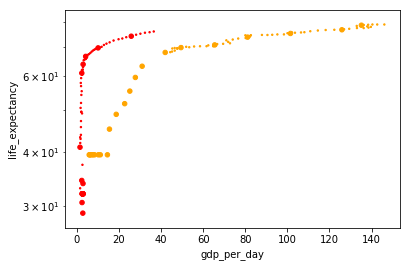

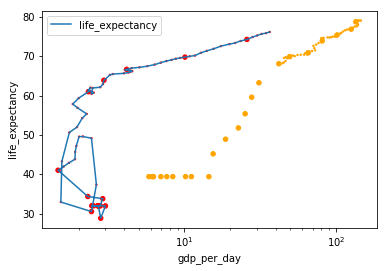

In [41]:
data = gapminder.query('(country == "China")or (country =="United States")')

size = np.where(data.year % 10 == 0,20,2)
color = np.where(data.country =="China", 'red','orange')
data.plot.scatter("gdp_per_day","life_expectancy", logy = True, s= size, c = color)

ax = data.plot.scatter("gdp_per_day","life_expectancy", logx = True, s=size, c=color)
data[data.country =='China'].plot.line(x ='gdp_per_day', y ='life_expectancy', ax =ax)
# How about China and US
#